# Chapter Goals
- Data transformation and cleansing techniques.

# General Lab Guidlines
- Visualization.
- Modifiable code snippets.

---

In [ ]:
# Loading a dataset
# dataset names: "airline", "breast-cancer", "contact-lenses", "cpu", "cpu.with.vendor", "credit-g", "diabetes", "glass", "hypothyroid", "ionosphere", "iris.2D", "iris", "labor", "segment-challenge", "segment-test", "soybean", "supermarket", "unbalanced", "vote", "weather.nominal", "weather.numeric"
# df = pd.read_csv("data/weather.numeric.csv")
# instances = loader.load_file("data/weather.numeric.arff")

# Modules & Datasets Setup

In [ ]:
# @title
!apt-get install default-jdk
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jdk is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
# @title
!pip install pygraphviz
!pip install python-javabridge
!pip install python-weka-wrapper3
!pip install sklearn-weka-plugin

  Using cached sklearn-weka-plugin-0.0.7.tar.gz (69 kB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# @title
#Restart runtime after installing the dependencies

In [ ]:
# @title
import os
import glob
import numpy as np
import pandas as pd
import weka.core.jvm as jvm
from weka.core import converters
import matplotlib.pyplot as plt

In [ ]:
# @title
data_dir = 'data'

In [ ]:
# @title
#!rm -r weka
#!rm -r data

In [ ]:
# @title
#jvm.stop()
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.10/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/core.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/mtj.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/arpack_combined.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [ ]:
# @title
# Preparing Datasets
if not os.path.exists(data_dir):
    !mkdir $data_dir
    for file in ['airline.arff', 'breast-cancer.arff', 'contact-lenses.arff', 'cpu.arff', 'cpu.with.vendor.arff', 'credit-g.arff', 'diabetes.arff', 'glass.arff', 'hypothyroid.arff', 'ionosphere.arff', 'iris.2D.arff', 'iris.arff', 'labor.arff', 'segment-challenge.arff', 'segment-test.arff', 'soybean.arff', 'supermarket.arff', 'unbalanced.arff', 'vote.arff', 'weather.nominal.arff', 'weather.numeric.arff',]:
        url = 'https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/' + file
        !wget -P $data_dir $url
    loader = converters.Loader(classname="weka.core.converters.ArffLoader")
    saver = converters.Saver(classname="weka.core.converters.CSVSaver")
    for file in glob.glob(os.path.join(data_dir, '*.arff')):
        dataset = loader.load_file(file)
        filename, file_extension = os.path.splitext(file)
        saver.save_file(dataset, filename + '.csv')
    !wget -P $data_dir https://raw.githubusercontent.com/Rytuo/ITMO-CT/master/Others/AdvancedML/data/OpenML/data/1438.arff
    !rm -r weka

In [ ]:
# @title
import weka.core.packages as packages
packages.install_package("simpleEducationalLearningSchemes")
packages.install_package("generalizedSequentialPatterns")
packages.install_package("classAssociationRules")
packages.install_package("NNge")
packages.install_package("LibSVM")

from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.ArffLoader")

# 8.1 Attribute Selection

## Scheme-independent seletion

_Fliteration_. By statistical correlation.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
# Create a DataFrame from the features
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])

# Calculate the correlation matrix
correlation_matrix = df.corr()

correlation_matrix

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
feature_0,1.000000,0.058172,0.935882,0.012282,0.027394,0.016197,-0.779008,-0.028237,-0.701895,-0.035538
feature_1,0.058172,1.000000,0.062426,0.022266,-0.031579,-0.026735,-0.059525,0.037916,-0.024690,-0.048878
feature_2,0.935882,0.062426,1.000000,0.014551,0.012872,-0.000606,-0.949966,-0.013006,-0.405943,-0.025878
feature_3,0.012282,0.022266,0.014551,1.000000,-0.016467,-0.002439,-0.015008,0.032063,-0.002441,-0.043532
feature_4,0.027394,-0.031579,0.012872,-0.016467,1.000000,-0.010388,0.001379,-0.039584,-0.045036,0.041455
feature_5,0.016197,-0.026735,-0.000606,-0.002439,-0.010388,1.000000,0.015440,-0.017981,-0.043242,-0.036535
feature_6,-0.779008,-0.059525,-0.949966,-0.015008,0.001379,0.015440,1.000000,-0.001887,0.100172,0.014548
feature_7,-0.028237,0.037916,-0.013006,0.032063,-0.039584,-0.017981,-0.001887,1.000000,0.046952,-0.039575
feature_8,-0.701895,-0.024690,-0.405943,-0.002441,-0.045036,-0.043242,0.100172,0.046952,1.000000,0.039866
feature_9,-0.035538,-0.048878,-0.025878,-0.043532,0.041455,-0.036535,0.014548,-0.039575,0.039866,1.000000


In [ ]:
# Drop features by a threshold

# Set a correlation threshold (you can adjust this)
correlation_threshold = 0.7

# Find uncorrelated features
uncorrelated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) < correlation_threshold:
            colname = correlation_matrix.columns[i]
            uncorrelated_features.add(colname)

# Remove the uncorrelated features
X_selected = df.drop(uncorrelated_features, axis=1).values

# Now X_selected contains the features after removing highly correlated ones
print(f"Original number of features: {X.shape[1]}")
print(f"Number of features after feature selection: {X_selected.shape[1]}")

Original number of features: 10
Number of features after feature selection: 1


_Wrapper_. By a machine learning algorithm.

In [ ]:
# Train a linear regression model
# Select top k features by coefficients weights

import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
coefficients = regressor.coef_
feature_names = [f"feature_{i}" for i in range(X.shape[1])]

coefficients

# Create a dictionary mapping feature names to their coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Sort features based on their coefficients
sorted_features = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Select the top k features based on absolute coefficient values
k = 3
selected_features = sorted_features[:k]

selected_features

[('feature_6', 76.33123133223371),
 ('feature_3', 75.31140259252764),
 ('feature_9', 58.29257430695129)]

## Searching the Attribute Space

Recursive Feature Elimination

In [ ]:
# This is achieved by fitting the given machine learning algorithm used in the core of the model
# ranking features by importance,
# discarding the least important features,
# and re-fitting the model.
# This process is repeated until a specified number of features remains.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Set a random seed for reproducibility
np.random.seed(42)

# Step 1: Generate a dummy dataset
def generate_dummy_data(n_samples=1000):
    data = {
        'feature1': np.random.rand(n_samples),
        'feature2': np.random.rand(n_samples),
        'feature3': np.random.rand(n_samples),
        'feature4': np.random.rand(n_samples),
        'target': np.random.choice([0, 1], size=n_samples)
    }
    return pd.DataFrame(data)

# Step 2: Split the dataset into training and testing sets
def split_data(df):
    X = df.drop('target', axis=1)
    y = df['target']
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build a model and evaluate it
def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Step 4: Run the RFE feature selection
def rfe_feature_selection_demo(df, num_features_to_select=1):
    X_train, X_test, y_train, y_test = split_data(df)

    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Create the RFE model and select features
    rfe = RFE(model, n_features_to_select=num_features_to_select)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    # Train and evaluate the model on the selected features
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Selected Features: {X_train.columns[rfe.support_]}')
    print(f'Accuracy with Selected Features: {accuracy:.4f}')

# Step 5: Run the RFE feature selection demo
dummy_data = generate_dummy_data()
rfe_feature_selection_demo(dummy_data, num_features_to_select=2)

Selected Features: Index(['feature2', 'feature4'], dtype='object')
Accuracy with Selected Features: 0.5600


## Scheme-specific Selection

**Task 8.1.1** Demonstrate the following quote from the book:

> A simple method for accelerating scheme-specific search is to preselect a given number of attributes by ranking them first using a criterion like the information gain and discarding the rest before applying scheme-specific selection.

e.g. ou can combine the statistical correlation with recursive feature elimination shown to you.

# 8.2 Discretizing Numeric Attributes

Unsupervised equal-interval binning is demonstrated early.

**Task 8.2.1** Search and demonstrate the following unsupervised discretization method.

> the number of bins is chosen in a data-dependent fashion by setting it to the square root of the number of instances. This method is called _proportional k-interval discretization_.

**Entropy-based**

In [ ]:
# 'information' is the amount of information required to specify the individual values of yes and no given the split.
# We seek a discretization that makes the subintervals as pure as possible
# hence, we choose to split at the point where the information value is smallest.
# in other words, where we don't need to specify a lot to reach yes and no instances.

import numpy as np
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer

# Generate some example numeric data
np.random.seed(42)
numeric_data = np.random.rand(100, 1) * 10  # Replace this with your own numeric data

# Set the number of bins (adjust this based on your dataset)
num_bins = 5

# Create a KBinsDiscretizer with 'entropy' as the criterion
kbd = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform', criterion='entropy')

# Fit and transform the numeric data
discretized_data = kbd.fit_transform(numeric_data)

# Convert the result to a DataFrame for better visualization
discretized_df = pd.DataFrame(discretized_data, columns=['Discretized'])

# Display the original and discretized data side by side
print(pd.DataFrame(np.hstack([numeric_data, discretized_data]), columns=['Original', 'Discretized']))

# 8.3 Projections

**Principal Component Analysis (PCA)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# 4 features
X.shape

(150, 4)

In [ ]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# 2 features in reduced data
X_pca.shape

(150, 2)

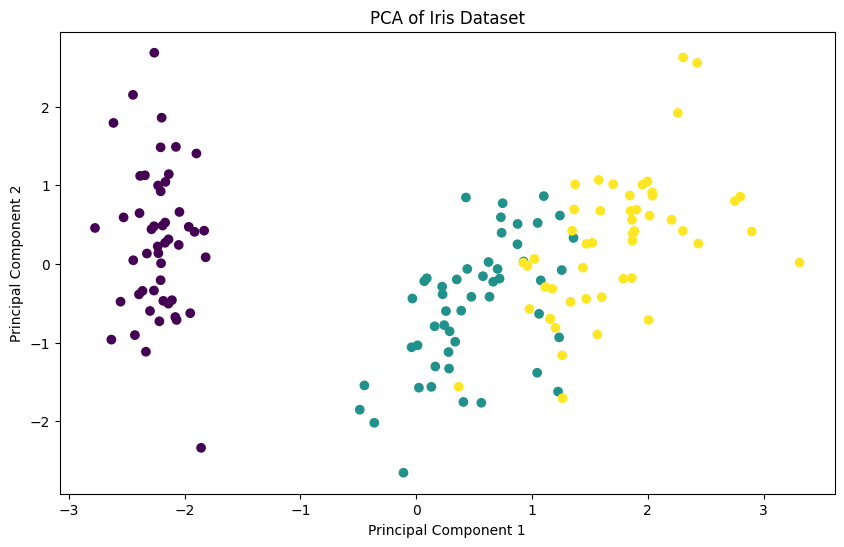

In [ ]:
# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y

# Visualize the results
plt.figure(figsize=(10, 6))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')

plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], c = df_pca['Target'])

plt.show()

**Task 8.3.1** Train a machine learning model before and after PCA. Compare evaluation metrics.

# 8.4 Sampling

In [ ]:
# Reservoir Sampling

# Generating a random sample of an input stream without storing all the instances beforehand
# Fill the reservoir
# The next one of stream will be included in the sample with probability r/(r+1)

import random

def reservoir_sampling(stream, k):
    """
    Perform reservoir sampling on a data stream.

    Parameters:
    - stream: An iterable representing the data stream.
    - k: The number of elements to sample.

    Returns:
    A list of k sampled elements.
    """

    reservoir = []

    # Fill the reservoir with the first k elements
    for i, element in enumerate(stream):
        if i < k:
            reservoir.append(element)
        else:
            # Randomly replace elements in the reservoir
            j = random.randint(0, i)
            if j < k:
                reservoir[j] = element

    return reservoir

# Example usage
data_stream = range(1, 11)  # Example data stream from 1 to 100
sample_size = 2


reservoir_sampling(data_stream, sample_size)

[6, 8]

# 8.5 Cleansing

**Task 8.5.1** Demonstrate the following.

> decision trees induced from training data can often be simplified, without loss of accuracy, by discarding misclassified instances from the training set, relearning, and then repeating until there are no misclassified instances.

You may find code snippets from the previous lab useful.

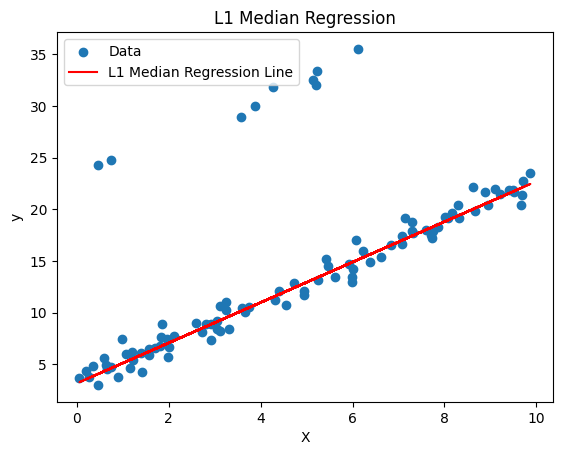

In [ ]:
# Media regression

# Robust against outliers

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate some example data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 3 + np.random.normal(0, 1, size=(100, 1))

# Add some outliers to the data
outliers = np.random.randint(0, 100, 10)
y[outliers] += 20  # Introduce outliers

# Perform L1 median regression
X_with_intercept = sm.add_constant(X)
median_model = sm.RLM(y, X_with_intercept, M=sm.robust.norms.TrimmedMean())
median_results = median_model.fit()

# Get the regression line parameters
intercept, slope = median_results.params

# Visualize the data and the regression line

plt.scatter(X, y, label='Data')
plt.plot(X, intercept + slope * X, color='red', label='L1 Median Regression Line')
plt.title('L1 Median Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

**Task 8.5.2** Make a regression more robust against outliers by one of the following:
- Train a regression model with absolute-value distance measure instead of the usual squared one.
- Train a regression line and then eliminate the 10% of points that lie furthest from the line.

Compare and evaluate with the standard approach.

# 8.6 Transforming Multiple Classes to Binary Ones

In [ ]:
# transform multiclass problems into multiple two-class one
# the dataset is decomposed into several two-class problems
# the algorithm is run on each one
# outputs of the resulting classifiers are combined

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# One-vs-Rest strategy
ovr_classifier = OneVsRestClassifier(svm_classifier)

# Train the classifier using the one-vs-rest strategy
ovr_classifier.fit(X_train, y_train)

# Make predictions
y_pred_ovr = ovr_classifier.predict(X_test)

# print
y_pred_ovr

# Observe we have 3 classes

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

**Task 8.6.1** Try _One Vs One_ strategy with by substituting line: `ovo_classifier = OneVsOneClassifier(svm_classifier)`. Evaluate and compare results.

